In [1]:
import gzip
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter
from pathlib import Path
from scipy.stats import entropy

# Ignore SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# Load the data
def load_to_dataframe(file_path):
    with gzip.open(file_path, "rt", encoding="utf-8") as f:
        data = [json.loads(line) for line in f]
    df = pd.DataFrame(data)
    return df

In [3]:
# Bitcoin Client Pull Requests:
file_path = (Path.cwd() / '..' / 'data' / 'ReferenceClients' / 'Bitcoin_refClient_pullRequests.jsonl.gz').resolve()
df_BitcoinPR = load_to_dataframe(file_path)
df_BitcoinPR

,number,title,state,url,createdAt,mergedAt,author,labels,comments,reviews
0,9,Fix for GUI on Macs and latest wxWidgets,CLOSED,https://github.com/bitcoin/bitcoin/pull/9,2010-12-20T15:47:21Z,None,{'login': 'gavinandresen'},{'edges': []},{'edges': [{'node': {'author': {'login': 'gavi...,{'edges': []}
1,10,Add address to listtransactions output,MERGED,https://github.com/bitcoin/bitcoin/pull/10,2010-12-21T18:50:52Z,2011-01-03T19:52:09Z,{'login': 'gavinandresen'},{'edges': [{'node': {'name': 'Feature'}}]},{'edges': []},{'edges': []}
2,11,Nolisten patch,MERGED,https://github.com/bitcoin/bitcoin/pull/11,2010-12-22T13:15:11Z,2011-01-03T19:43:36Z,None,{'edges': [{'node': {'name': 'Feature'}}]},{'edges': [{'node': {'author': {'login': 'gavi...,{'edges': []}
3,21,Add time to category:move transactions,MERGED,https://github.com/bitcoin/bitcoin/pull/21,2011-01-05T14:54:03Z,2011-01-06T13:59:02Z,{'login': 'gavinandresen'},{'edges': [{'node': {'name': 'Bug'}}]},{'edges': []},{'edges': []}
4,23,CORS support,CLOSED,https://github.com/bitcoin/bitcoin/pull/23,2011-01-07T17:45:28Z,None,{'login': 'gavinandresen'},{'edges': [{'node': {'name': 'Feature'}}]},{'edges': [{'node': {'author': {'login': 'davo...,{'edges': []}
...,...,...,...,...,...,...,...,...,...,...
20502,29771,test: Run framework unit tests in parallel,OPEN,https://github.com/bitcoin/bitcoin/pull/29771,2024-03-31T03:42:23Z,None,{'login': 'tdb3'},{'edges': [{'node': {'name': 'Tests'}}]},{'edges': [{'node': {'author': {'login': 'Drah...,{'edges': []}
20503,29773,"build, bench, msvc: Add missing benchmarks",OPEN,https://github.com/bitcoin/bitcoin/pull/29773,2024-03-31T09:43:10Z,None,{'login': 'hebasto'},"{'edges': [{'node': {'name': 'Windows'}}, {'no...",{'edges': [{'node': {'author': {'login': 'Drah...,{'edges': []}
20504,29774,build: Enable fuzz binary in MSVC,OPEN,https://github.com/bitcoin/bitcoin/pull/29774,2024-03-31T16:00:12Z,None,{'login': 'hebasto'},{'edges': [{'node': {'name': 'Build system'}}]},{'edges': [{'node': {'author': {'login': 'Drah...,{'edges': [{'node': {'author': {'login': 'Empa...
20505,29775,[DO NOT MERGE] testnet4 including PoW difficul...,OPEN,https://github.com/bitcoin/bitcoin/pull/29775,2024-03-31T22:55:22Z,None,{'login': 'fjahr'},{'edges': [{'node': {'name': 'CI failed'}}]},{'edges': [{'node': {'author': {'login': 'Drah...,{'edges': []}


In [4]:
# Eth Client Pull Requests:
file_path = (Path.cwd() / '..' / 'data' / 'ReferenceClients' / 'Ethereum_refClient_pullRequests.jsonl.gz').resolve()
df_EthereumPR = load_to_dataframe(file_path)
df_EthereumPR

,number,title,state,url,createdAt,mergedAt,author,labels,comments,reviews
0,2,fix N being overwritten by BigInt.Div function...,CLOSED,https://github.com/ethereum/go-ethereum/pull/2,2014-01-10T05:26:49Z,None,{'login': 'vessenes'},{'edges': []},{'edges': [{'node': {'author': {'login': 'obsc...,{'edges': []}
1,3,Corrected typo ‘enroding > encoding’,CLOSED,https://github.com/ethereum/go-ethereum/pull/3,2014-01-15T16:10:04Z,None,{'login': 'stephantual'},{'edges': []},{'edges': [{'node': {'author': {'login': 'step...,{'edges': []}
2,4,Fixed typo (credit to comma 8),MERGED,https://github.com/ethereum/go-ethereum/pull/4,2014-01-15T17:41:33Z,2014-01-19T23:58:41Z,{'login': 'stephantual'},{'edges': []},{'edges': []},{'edges': []}
3,11,"Update build instructions, especially for OS X",MERGED,https://github.com/ethereum/go-ethereum/pull/11,2014-02-01T03:23:03Z,2014-02-02T11:21:55Z,{'login': 'hiddentao'},{'edges': []},{'edges': []},{'edges': []}
4,19,Update README.md,CLOSED,https://github.com/ethereum/go-ethereum/pull/19,2014-02-22T20:16:27Z,None,{'login': 'guaka'},{'edges': [{'node': {'name': 'status:wontfix'}}]},{'edges': [{'node': {'author': {'login': 'obsc...,{'edges': []}
...,...,...,...,...,...,...,...,...,...,...
10020,29419,trie: using maps.Clone,MERGED,https://github.com/ethereum/go-ethereum/pull/2...,2024-04-01T02:11:49Z,2024-04-01T03:42:51Z,{'login': 'cuiweixie'},{'edges': []},{'edges': [{'node': {'author': {'login': 'cuiw...,{'edges': [{'node': {'author': {'login': 'rjl4...
10021,29420,eth: improve counting logic,OPEN,https://github.com/ethereum/go-ethereum/pull/2...,2024-04-01T02:15:53Z,None,{'login': 'cuiweixie'},{'edges': []},{'edges': []},{'edges': []}
10022,29421,rlp: using slices.IndexFunc,CLOSED,https://github.com/ethereum/go-ethereum/pull/2...,2024-04-01T02:38:22Z,None,{'login': 'cuiweixie'},{'edges': []},{'edges': []},{'edges': [{'node': {'author': {'login': 'rjl4...
10023,29422,p2p: fix comment,OPEN,https://github.com/ethereum/go-ethereum/pull/2...,2024-04-01T05:55:12Z,None,{'login': 'stayweek'},{'edges': []},{'edges': []},{'edges': []}


In [5]:
# Hedera Client Pull Requests:
file_path = (Path.cwd() / '..' / 'data' / 'ReferenceClients' / 'Hedera_refClient_pullRequests.jsonl.gz').resolve()
df_HederaPR = load_to_dataframe(file_path)
df_HederaPR

,number,title,state,url,createdAt,mergedAt,author,labels,comments,reviews
0,203,00028 New infrastructure and AWS keys,MERGED,https://github.com/hashgraph/hedera-services/p...,2020-05-12T23:06:40Z,2020-05-13T01:37:50Z,{'login': 'qnswirlds'},{'edges': []},{'edges': []},{'edges': [{'node': {'author': {'login': 'ljia...
1,204,027 d hashgraph hedera services regression,MERGED,https://github.com/hashgraph/hedera-services/p...,2020-05-13T19:57:53Z,2020-05-13T21:29:53Z,{'login': 'ljianghedera'},{'edges': []},{'edges': []},{'edges': [{'node': {'author': {'login': 'qnsw...
2,207,0205 d enable sonar scan,MERGED,https://github.com/hashgraph/hedera-services/p...,2020-05-14T02:00:33Z,2020-05-14T04:11:00Z,{'login': 'ljianghedera'},{'edges': []},{'edges': []},{'edges': [{'node': {'author': {'login': 'qnsw...
3,209,"Codecov config, misc open review cleanup",CLOSED,https://github.com/hashgraph/hedera-services/p...,2020-05-14T06:44:23Z,None,{'login': 'tinker-michaelj'},{'edges': []},{'edges': []},{'edges': [{'node': {'author': {'login': 'ljia...
4,210,"Add codecov integration to CI, missing metadat...",MERGED,https://github.com/hashgraph/hedera-services/p...,2020-05-14T06:49:05Z,2020-05-14T16:39:37Z,{'login': 'tinker-michaelj'},{'edges': []},{'edges': [{'node': {'author': {'login': 'code...,{'edges': [{'node': {'author': {'login': 'stev...
...,...,...,...,...,...,...,...,...,...,...
5692,12477,chore: Fix synk expiry,MERGED,https://github.com/hashgraph/hedera-services/p...,2024-04-01T21:06:14Z,2024-04-01T21:16:24Z,{'login': 'Neeharika-Sompalli'},{'edges': []},{'edges': []},{'edges': [{'node': {'author': {'login': 'nath...
5693,12478,feat: swirlds-logging changes after jitwatch a...,OPEN,https://github.com/hashgraph/hedera-services/p...,2024-04-01T23:41:27Z,None,{'login': 'mxtartaglia-sl'},{'edges': []},{'edges': [{'node': {'author': {'login': 'gith...,{'edges': []}
5694,12479,fix: 12466 Fixed NPE intermitently occurring a...,OPEN,https://github.com/hashgraph/hedera-services/p...,2024-04-02T01:30:06Z,None,{'login': 'imalygin'},{'edges': []},{'edges': [{'node': {'author': {'login': 'gith...,{'edges': []}
5695,12480,chore: (cherry-pick) Fix synk expiry (#12477),MERGED,https://github.com/hashgraph/hedera-services/p...,2024-04-02T01:45:18Z,2024-04-02T04:27:41Z,{'login': 'Neeharika-Sompalli'},{'edges': []},{'edges': [{'node': {'author': {'login': 'gith...,{'edges': [{'node': {'author': {'login': 'nath...


In [6]:
# XRPL Client Pull Requests:
file_path = (Path.cwd() / '..' / 'data' / 'ReferenceClients' / 'XRPL_refClient_pullRequests.jsonl.gz').resolve()
df_XrplPR = load_to_dataframe(file_path)
df_XrplPR

,number,title,state,url,createdAt,mergedAt,author,labels,comments,reviews
0,41,Fix msvc,CLOSED,https://github.com/XRPLF/rippled/pull/41,2013-05-03T18:50:04Z,None,{'login': 'vinniefalco'},{'edges': []},{'edges': []},{'edges': []}
1,42,Websockets as subtree,MERGED,https://github.com/XRPLF/rippled/pull/42,2013-05-04T01:30:19Z,2013-05-06T20:53:00Z,{'login': 'vinniefalco'},{'edges': []},{'edges': []},{'edges': []}
2,43,Port leveldb,MERGED,https://github.com/XRPLF/rippled/pull/43,2013-05-04T19:29:00Z,2013-05-05T02:13:55Z,{'login': 'vinniefalco'},{'edges': []},{'edges': []},{'edges': []}
3,44,Vs2012 with leveldb,MERGED,https://github.com/XRPLF/rippled/pull/44,2013-05-04T20:23:21Z,2013-05-05T02:13:55Z,{'login': 'vinniefalco'},{'edges': []},{'edges': []},{'edges': []}
4,45,Protobuf as subtree,MERGED,https://github.com/XRPLF/rippled/pull/45,2013-05-12T20:15:55Z,2013-05-12T23:15:19Z,{'login': 'vinniefalco'},{'edges': []},{'edges': []},{'edges': []}
...,...,...,...,...,...,...,...,...,...,...
3573,4967,Increase unit tests coverage for AMM,OPEN,https://github.com/XRPLF/rippled/pull/4967,2024-03-25T22:53:45Z,None,{'login': 'Bronek'},{'edges': []},{'edges': [{'node': {'author': {'login': 'code...,{'edges': []}
3574,4968,Proposed 2.1.1,MERGED,https://github.com/XRPLF/rippled/pull/4968,2024-03-26T23:33:16Z,2024-03-27T12:47:00Z,{'login': 'seelabs'},{'edges': []},{'edges': [{'node': {'author': {'login': 'code...,{'edges': [{'node': {'author': {'login': 'scot...
3575,4970,Merge master (v2.1.1) into develop,OPEN,https://github.com/XRPLF/rippled/pull/4970,2024-03-28T18:16:57Z,None,{'login': 'ximinez'},{'edges': []},{'edges': []},{'edges': []}
3576,4971,Increase test coverage,OPEN,https://github.com/XRPLF/rippled/pull/4971,2024-03-29T19:29:12Z,None,{'login': 'thejohnfreeman'},{'edges': []},{'edges': []},{'edges': [{'node': {'author': {'login': 'greg...


In [7]:
# Algorand Client Pull Requests:
file_path = (Path.cwd() / '..' / 'data' / 'ReferenceClients' / 'Algorand_refClient_pullRequests.jsonl.gz').resolve()
df_AlgorandPR = load_to_dataframe(file_path)
df_AlgorandPR

,number,title,state,url,createdAt,mergedAt,author,labels,comments,reviews
0,2,fix flaky agreement test: make sortition deter...,MERGED,https://github.com/algorand/go-algorand/pull/2,2019-06-12T16:58:47Z,2019-06-12T18:00:01Z,{'login': 'Vervious'},{'edges': [{'node': {'name': 'test'}}]},{'edges': [{'node': {'author': {'login': 'CLAa...,{'edges': [{'node': {'author': {'login': 'zeld...
1,3,make ledger.ErrNoEntry more informative,MERGED,https://github.com/algorand/go-algorand/pull/3,2019-06-12T17:13:53Z,2019-06-13T17:26:19Z,{'login': 'zeldovich'},{'edges': []},{'edges': [{'node': {'author': {'login': 'CLAa...,{'edges': [{'node': {'author': {'login': 'Evan...
2,4,"cleanup Gopkg.toml based on suggestions from ""...",MERGED,https://github.com/algorand/go-algorand/pull/4,2019-06-12T17:15:57Z,2019-06-13T17:26:35Z,{'login': 'zeldovich'},{'edges': []},{'edges': [{'node': {'author': {'login': 'CLAa...,{'edges': [{'node': {'author': {'login': 'algo...
3,5,websocket: terminate flushThread on Close() wi...,MERGED,https://github.com/algorand/go-algorand/pull/5,2019-06-12T17:16:47Z,2019-06-13T17:26:44Z,{'login': 'zeldovich'},{'edges': [{'node': {'name': 'bug'}}]},{'edges': [{'node': {'author': {'login': 'CLAa...,{'edges': [{'node': {'author': {'login': 'algo...
4,6,fix ledger ErrNoEntry issue due to sqlite,MERGED,https://github.com/algorand/go-algorand/pull/6,2019-06-12T17:18:11Z,2019-06-12T18:36:56Z,{'login': 'zeldovich'},{'edges': [{'node': {'name': 'bug'}}]},{'edges': [{'node': {'author': {'login': 'CLAa...,{'edges': [{'node': {'author': {'login': 'derb...
...,...,...,...,...,...,...,...,...,...,...
4288,5964,CICD: go-algorand relstable3.23.1-remerge merg...,MERGED,https://github.com/algorand/go-algorand/pull/5964,2024-03-20T14:58:09Z,2024-03-20T17:13:58Z,{'login': 'Algo-devops-service'},{'edges': [{'node': {'name': 'Team Hyper Flow'...,{'edges': [{'node': {'author': {'login': 'CLAa...,{'edges': [{'node': {'author': {'login': 'algo...
4289,5965,refactor: remove ledgercore.OnlineAccountData,OPEN,https://github.com/algorand/go-algorand/pull/5965,2024-03-20T21:23:57Z,None,{'login': 'algorandskiy'},{'edges': [{'node': {'name': 'Skip-Release-Not...,{'edges': [{'node': {'author': {'login': 'code...,{'edges': []}
4290,5966,tests: remove checkSpender duplicate function,OPEN,https://github.com/algorand/go-algorand/pull/5966,2024-03-22T22:16:50Z,None,{'login': 'algorandskiy'},{'edges': [{'node': {'name': 'Skip-Release-Not...,{'edges': [{'node': {'author': {'login': 'code...,{'edges': []}
4291,5967,agreement: split ValidatedBlock and AssembledB...,OPEN,https://github.com/algorand/go-algorand/pull/5967,2024-03-27T14:21:48Z,None,{'login': 'cce'},{'edges': [{'node': {'name': 'Enhancement'}}]},{'edges': [{'node': {'author': {'login': 'code...,{'edges': [{'node': {'author': {'login': 'gmal...


In [8]:
# Cardano Client Pull Requests:
file_path = (Path.cwd() / '..' / 'data' / 'ReferenceClients' / 'Cardano_refClient_pullRequests.jsonl.gz').resolve()
df_CardanoPR = load_to_dataframe(file_path)
df_CardanoPR

,number,title,state,url,createdAt,mergedAt,author,labels,comments,reviews
0,1,Cleaned up.,MERGED,https://github.com/cardano-foundation/develope...,2021-02-23T16:42:26Z,2021-02-23T16:43:40Z,{'login': 'katomm'},{'edges': []},{'edges': []},{'edges': []}
1,2,Design,MERGED,https://github.com/cardano-foundation/develope...,2021-02-23T20:57:30Z,2021-02-23T20:58:47Z,{'login': 'katomm'},{'edges': []},{'edges': []},{'edges': []}
2,3,Varia,MERGED,https://github.com/cardano-foundation/develope...,2021-02-24T17:55:35Z,2021-02-24T17:57:02Z,{'login': 'katomm'},{'edges': []},{'edges': []},{'edges': []}
3,4,Updated search config.,MERGED,https://github.com/cardano-foundation/develope...,2021-02-24T19:42:55Z,2021-02-24T20:42:02Z,{'login': 'katomm'},{'edges': []},{'edges': []},{'edges': []}
4,5,Content,MERGED,https://github.com/cardano-foundation/develope...,2021-02-24T20:42:41Z,2021-02-24T20:44:17Z,{'login': 'katomm'},{'edges': []},{'edges': []},{'edges': []}
...,...,...,...,...,...,...,...,...,...,...
1085,1230,Installing Cardano Wallet: fix + clarify links,MERGED,https://github.com/cardano-foundation/develope...,2024-03-21T02:29:23Z,2024-03-21T13:58:44Z,{'login': 'syncquick'},{'edges': [{'node': {'name': 'documentation'}}]},{'edges': [{'node': {'author': {'login': 'rdlr...,{'edges': [{'node': {'author': {'login': 'rpha...
1086,1231,Get Started Overview: remove id from page meta...,CLOSED,https://github.com/cardano-foundation/develope...,2024-03-23T08:37:43Z,None,{'login': 'SahajCyberHawk'},{'edges': []},{'edges': [{'node': {'author': {'login': 'rpha...,{'edges': []}
1087,1232,Bump webpack-dev-middleware from 5.3.3 to 5.3.4,MERGED,https://github.com/cardano-foundation/develope...,2024-03-23T10:22:45Z,2024-04-02T08:09:35Z,{'login': 'dependabot'},{'edges': [{'node': {'name': 'dependencies'}}]},{'edges': []},{'edges': [{'node': {'author': {'login': 'rpha...
1088,1233,oex,CLOSED,https://github.com/cardano-foundation/develope...,2024-03-26T07:32:55Z,None,{'login': 'fiudzy'},{'edges': []},{'edges': []},{'edges': []}


In [9]:
# Bitcoin Client Core Issues
file_path = (Path.cwd() / '..' / 'data' / 'ReferenceClients' / 'Bitcoin_refClient_issues.jsonl.gz').resolve()
df_BitcoinIS = load_to_dataframe(file_path)
df_BitcoinIS

,number,title,state,url,createdAt,author,labels,comments
0,1,"JSON-RPC support for mobile devices (""ultra-li...",CLOSED,https://github.com/bitcoin/bitcoin/issues/1,2010-12-19T16:17:53Z,{'login': 'gavinandresen'},{'edges': [{'node': {'name': 'Feature'}}]},{'edges': [{'node': {'author': {'login': 'raso...
1,2,"Long-term, safe, store-of-value",CLOSED,https://github.com/bitcoin/bitcoin/issues/2,2010-12-19T16:22:54Z,{'login': 'gavinandresen'},{'edges': [{'node': {'name': 'Brainstorming'}}]},{'edges': [{'node': {'author': {'login': 'davo...
2,3,Encrypt wallet,CLOSED,https://github.com/bitcoin/bitcoin/issues/3,2010-12-19T16:24:45Z,{'login': 'gavinandresen'},{'edges': [{'node': {'name': 'Brainstorming'}}...,{'edges': [{'node': {'author': {'login': 'fabi...
3,4,"Export/Import wallet in a human readable, futu...",CLOSED,https://github.com/bitcoin/bitcoin/issues/4,2010-12-19T16:28:57Z,{'login': 'davout'},{'edges': []},{'edges': [{'node': {'author': {'login': 'gavi...
4,5,Make the version number the protocol version a...,CLOSED,https://github.com/bitcoin/bitcoin/issues/5,2010-12-19T20:06:45Z,{'login': 'cdecker'},{'edges': [{'node': {'name': 'Feature'}}]},{'edges': [{'node': {'author': {'login': 'tcat...
...,...,...,...,...,...,...,...,...
7866,29759,Tons of Socks5() connect to x.x.x.x:8333 faile...,OPEN,https://github.com/bitcoin/bitcoin/issues/29759,2024-03-28T17:27:07Z,{'login': 'kosuodhmwa'},{'edges': [{'node': {'name': 'Utils/log/libs'}}]},{'edges': [{'node': {'author': {'login': 'kosu...
7867,29760,build: Enable Fuzz binary in MSVC,OPEN,https://github.com/bitcoin/bitcoin/issues/29760,2024-03-28T18:25:15Z,{'login': 'maflcko'},"{'edges': [{'node': {'name': 'Windows'}}, {'no...",{'edges': [{'node': {'author': {'login': 'mafl...
7868,29767,ThreadSanitizer: data race src/flatfile.cpp:47...,OPEN,https://github.com/bitcoin/bitcoin/issues/29767,2024-03-30T10:17:39Z,{'login': 'maflcko'},{'edges': []},{'edges': [{'node': {'author': {'login': 'nanl...
7869,29768,test: test/functional/feature_rbf.py fails to ...,CLOSED,https://github.com/bitcoin/bitcoin/issues/29768,2024-03-30T14:15:09Z,{'login': 'emc99'},{'edges': []},{'edges': []}


In [10]:
# Eth Client Core Issues
file_path = (Path.cwd() / '..' / 'data' / 'ReferenceClients' / 'Ethereum_refClient_issues.jsonl.gz').resolve()
df_EthereumIS = load_to_dataframe(file_path)
df_EthereumIS

,number,title,state,url,createdAt,author,labels,comments
0,1,sha3 not found Mac Mavericks,CLOSED,https://github.com/ethereum/go-ethereum/issues/1,2014-01-09T17:58:47Z,{'login': 'vessenes'},{'edges': []},{'edges': [{'node': {'author': {'login': 'vess...
1,5,License ?,CLOSED,https://github.com/ethereum/go-ethereum/issues/5,2014-01-25T01:09:24Z,{'login': 'orandolabs'},{'edges': []},{'edges': [{'node': {'author': {'login': 'obsc...
2,6,TODO List,CLOSED,https://github.com/ethereum/go-ethereum/issues/6,2014-01-25T15:28:28Z,{'login': 'obscuren'},{'edges': [{'node': {'name': 'type:feature'}}]},{'edges': [{'node': {'author': {'login': 'suhr...
3,7,Peer network health check,CLOSED,https://github.com/ethereum/go-ethereum/issues/7,2014-01-26T23:32:48Z,{'login': 'obscuren'},{'edges': [{'node': {'name': 'type:feature'}}]},{'edges': []}
4,8,Build error at line 174 in peer.go,CLOSED,https://github.com/ethereum/go-ethereum/issues/8,2014-01-27T03:12:26Z,{'login': 'awesomebjt'},{'edges': []},{'edges': []}
...,...,...,...,...,...,...,...,...
7856,29409,"Why this: ""trie is already committed""",CLOSED,https://github.com/ethereum/go-ethereum/issues...,2024-03-31T06:12:14Z,{'login': 'ethever'},{'edges': [{'node': {'name': 'type:docs'}}]},{'edges': []}
7857,29410,"Why this command can cause a ""trie is already ...",OPEN,https://github.com/ethereum/go-ethereum/issues...,2024-03-31T06:35:01Z,{'login': 'ethever'},{'edges': [{'node': {'name': 'type:bug'}}]},{'edges': []}
7858,29414,Report a mising feature,CLOSED,https://github.com/ethereum/go-ethereum/issues...,2024-03-31T12:42:27Z,{'login': 'zxramozx'},{'edges': [{'node': {'name': 'type:feature'}}]},{'edges': []}
7859,29415,Pending Log Subscription emits logs at extreme...,OPEN,https://github.com/ethereum/go-ethereum/issues...,2024-03-31T15:11:00Z,{'login': 'nakedkoalacapital'},{'edges': [{'node': {'name': 'type:bug'}}]},{'edges': [{'node': {'author': {'login': 's1na...


In [11]:
# Hedera Client Core Issues
file_path = (Path.cwd() / '..' / 'data' / 'ReferenceClients' / 'Hedera_refClient_issues.jsonl.gz').resolve()
df_HederaIS = load_to_dataframe(file_path)
df_HederaIS

,number,title,state,url,createdAt,author,labels,comments
0,1,TLS on GRPC,CLOSED,https://github.com/hashgraph/hedera-services/i...,2020-05-08T04:23:27Z,{'login': 'tinker-michaelj'},{'edges': []},{'edges': []}
1,2,<n/a>,CLOSED,https://github.com/hashgraph/hedera-services/i...,2020-05-08T04:25:48Z,{'login': 'tinker-michaelj'},{'edges': []},{'edges': []}
2,3,<n/a>,CLOSED,https://github.com/hashgraph/hedera-services/i...,2020-05-08T04:45:37Z,{'login': 'tinker-michaelj'},{'edges': []},{'edges': []}
3,4,<n/a>,CLOSED,https://github.com/hashgraph/hedera-services/i...,2020-05-08T04:55:47Z,{'login': 'tinker-michaelj'},{'edges': []},{'edges': []}
4,5,<n/a>,CLOSED,https://github.com/hashgraph/hedera-services/i...,2020-05-08T04:56:49Z,{'login': 'tinker-michaelj'},{'edges': []},{'edges': []}
...,...,...,...,...,...,...,...,...
6738,12474,JDB data file iterator may read less item byte...,CLOSED,https://github.com/hashgraph/hedera-services/i...,2024-04-01T19:37:06Z,{'login': 'artemananiev'},{'edges': [{'node': {'name': 'Platform Virtual...,{'edges': [{'node': {'author': {'login': 'arte...
6739,12475,Deal with 4+ reconnect attempts in JRS tests,OPEN,https://github.com/hashgraph/hedera-services/i...,2024-04-01T19:55:57Z,{'login': 'anthony-swirldslabs'},{'edges': []},{'edges': []}
6740,12481,(mod) Use expected query costs for `getContrac...,OPEN,https://github.com/hashgraph/hedera-services/i...,2024-04-02T03:56:40Z,{'login': 'tinker-michaelj'},{'edges': []},{'edges': []}
6741,12482,Implement negative test cases for transferToke...,OPEN,https://github.com/hashgraph/hedera-services/i...,2024-04-02T06:48:52Z,{'login': 'MrValioBg'},{'edges': [{'node': {'name': 'Limechain'}}]},{'edges': []}


In [12]:
# Algorand Client Core Issues
file_path = (Path.cwd() / '..' / 'data' / 'ReferenceClients' / 'Algorand_refClient_issues.jsonl.gz').resolve()
df_AlgorandIS = load_to_dataframe(file_path)
df_AlgorandIS

,number,title,state,url,createdAt,author,labels,comments
0,1,Fix configure_dev.sh so that it includes every...,CLOSED,https://github.com/algorand/go-algorand/issues/1,2019-06-12T15:42:49Z,{'login': 'derbear'},{'edges': [{'node': {'name': 'bug'}}]},{'edges': [{'node': {'author': {'login': 'iams...
1,12,"Fix warning spam: ""http block fetcher response...",CLOSED,https://github.com/algorand/go-algorand/issues/12,2019-06-13T15:44:34Z,{'login': 'winder'},{'edges': []},{'edges': [{'node': {'author': {'login': 'tsac...
2,20,libsodium-fork should be a submodule rather th...,CLOSED,https://github.com/algorand/go-algorand/issues/20,2019-06-13T19:10:49Z,{'login': 'algoradam'},{'edges': [{'node': {'name': 'Enhancement'}}]},{'edges': [{'node': {'author': {'login': 'Verv...
3,21,Allow nodes to be relays but not archival,CLOSED,https://github.com/algorand/go-algorand/issues/21,2019-06-13T20:48:44Z,{'login': 'algoradam'},"{'edges': [{'node': {'name': 'Enhancement'}}, ...",{'edges': [{'node': {'author': {'login': 'Verv...
4,23,programming language mismatch,CLOSED,https://github.com/algorand/go-algorand/issues/23,2019-06-14T01:44:46Z,{'login': 'gzuhlwang'},{'edges': [{'node': {'name': 'documentation'}}]},{'edges': [{'node': {'author': {'login': 'algo...
...,...,...,...,...,...,...,...,...
1619,5911,"There are 11 pages of GitHub issues, some as o...",CLOSED,https://github.com/algorand/go-algorand/issues...,2024-01-20T16:07:48Z,{'login': 'grzracz'},{'edges': [{'node': {'name': 'new-feature-requ...,{'edges': [{'node': {'author': {'login': 'gmal...
1620,5914,simulate fails with empty signature on a rekey...,OPEN,https://github.com/algorand/go-algorand/issues...,2024-01-21T19:31:51Z,{'login': 'joe-p'},{'edges': [{'node': {'name': 'bug'}}]},{'edges': [{'node': {'author': {'login': 'joe-...
1621,5916,Catchpoint is very slow,CLOSED,https://github.com/algorand/go-algorand/issues...,2024-01-22T08:55:30Z,{'login': 'alecalve'},{'edges': [{'node': {'name': 'bug'}}]},{'edges': [{'node': {'author': {'login': 'urth...
1622,5921,Add option to store and retrieve deltas,OPEN,https://github.com/algorand/go-algorand/issues...,2024-01-25T15:48:09Z,{'login': 'urtho'},{'edges': [{'node': {'name': 'Enhancement'}}]},{'edges': [{'node': {'author': {'login': 'jann...


In [13]:
# XRP Client Core Issues
file_path = (Path.cwd() / '..' / 'data' / 'ReferenceClients' / 'Xrpl_refClient_issues.jsonl.gz').resolve()
df_XrplIS = load_to_dataframe(file_path)
df_XrplIS

,number,title,state,url,createdAt,author,labels,comments
0,1,sjcl: undocumented build dependency: java,CLOSED,https://github.com/XRPLF/rippled/issues/1,2012-12-17T10:11:16Z,{'login': 'globalcitizen'},{'edges': []},{'edges': [{'node': {'author': {'login': 'ahbr...
1,2,NodeJS test scripts seek missing config.js,CLOSED,https://github.com/XRPLF/rippled/issues/2,2012-12-17T10:56:30Z,{'login': 'globalcitizen'},{'edges': []},{'edges': [{'node': {'author': {'login': 'ahbr...
2,3,UT make sure TrustSet fails if insufficient re...,CLOSED,https://github.com/XRPLF/rippled/issues/3,2012-12-18T22:55:12Z,{'login': 'ahbritto'},{'edges': []},{'edges': [{'node': {'author': {'login': 'vinn...
3,4,UT make sure OfferCreate respects reserves,CLOSED,https://github.com/XRPLF/rippled/issues/4,2012-12-18T23:10:52Z,{'login': 'ahbritto'},{'edges': []},{'edges': [{'node': {'author': {'login': 'vinn...
4,5,path bug,CLOSED,https://github.com/XRPLF/rippled/issues/5,2013-01-06T05:09:38Z,{'login': 'jedmccaleb'},{'edges': []},{'edges': [{'node': {'author': {'login': 'ahbr...
...,...,...,...,...,...,...,...,...
1341,4965,AMMCreate transaction missing Asset field in a...,OPEN,https://github.com/XRPLF/rippled/issues/4965,2024-03-24T16:21:19Z,{'login': 'Silkjaer'},{'edges': []},{'edges': []}
1342,4969,Node upgrade] (Version: [2.1.1],CLOSED,https://github.com/XRPLF/rippled/issues/4969,2024-03-28T03:47:40Z,{'login': 'xiongjiabing'},{'edges': [{'node': {'name': 'Feature Request'...,{'edges': [{'node': {'author': {'login': 'sapp...
1343,4973,[build docs error] (Version: [2.1.1]),OPEN,https://github.com/XRPLF/rippled/issues/4973,2024-03-31T06:40:10Z,{'login': 'Relect'},{'edges': []},{'edges': []}
1344,4974,this conan command is absent,OPEN,https://github.com/XRPLF/rippled/issues/4974,2024-03-31T12:19:12Z,{'login': 'Relect'},{'edges': []},{'edges': []}


In [14]:
# Cardano Client Core Issues
file_path = (Path.cwd() / '..' / 'data' / 'ReferenceClients' / 'Cardano_refClient_issues.jsonl.gz').resolve()
df_CardanoIS = load_to_dataframe(file_path)
df_CardanoIS

,number,title,state,url,createdAt,author,labels,comments
0,41,Stripping Videos from Stakepool Course,CLOSED,https://github.com/cardano-foundation/develope...,2021-04-26T08:02:46Z,{'login': 'rdlrt'},{'edges': [{'node': {'name': 'stake pool opera...,{'edges': [{'node': {'author': {'login': 'kato...
1,42,"SPO course, security review needed",CLOSED,https://github.com/cardano-foundation/develope...,2021-04-26T09:25:39Z,{'login': 'katomm'},"{'edges': [{'node': {'name': 'help wanted'}}, ...",{'edges': [{'node': {'author': {'login': 'rpha...
2,43,"SPO course, security chapter missing",CLOSED,https://github.com/cardano-foundation/develope...,2021-04-26T09:26:31Z,{'login': 'katomm'},"{'edges': [{'node': {'name': 'help wanted'}}, ...",{'edges': [{'node': {'author': {'login': 'rpha...
3,45,nodejs and yarn version,CLOSED,https://github.com/cardano-foundation/develope...,2021-04-30T05:28:55Z,{'login': 'adrem1'},{'edges': []},{'edges': [{'node': {'author': {'login': 'rdlr...
4,121,Cardano Key Pairs description missing,CLOSED,https://github.com/cardano-foundation/develope...,2021-07-13T09:23:40Z,{'login': 'csoroz'},{'edges': []},{'edges': [{'node': {'author': {'login': 'kato...
...,...,...,...,...,...,...,...,...
105,1210,CIP assets: images missing if in folder itself...,CLOSED,https://github.com/cardano-foundation/develope...,2024-02-10T19:01:37Z,{'login': 'rphair'},{'edges': [{'node': {'name': 'bug'}}]},{'edges': [{'node': {'author': {'login': 'fill...
106,1221,OK to add new elements to new CPS data structu...,CLOSED,https://github.com/cardano-foundation/develope...,2024-03-01T15:05:53Z,{'login': 'rphair'},{'edges': []},{'edges': [{'node': {'author': {'login': 'rpha...
107,1223,Revamp Governance Section: Proposal for a rest...,OPEN,https://github.com/cardano-foundation/develope...,2024-03-07T14:59:59Z,{'login': 'thenic95'},{'edges': []},{'edges': [{'node': {'author': {'login': 'rpha...
108,1229,CIP relative link problems: footer + nested RE...,OPEN,https://github.com/cardano-foundation/develope...,2024-03-20T16:14:19Z,{'login': 'rphair'},{'edges': [{'node': {'name': 'bug'}}]},{'edges': [{'node': {'author': {'login': 'rpha...


In [15]:
# Combines two dataframes (Issues and Pull Requests)
def combine_dataframes(pr_df, is_df, type_name='Type'):
    pr_df[type_name] = 'pullRequests'
    is_df[type_name] = 'issues'
    
    return pd.concat([pr_df, is_df], ignore_index=True, sort=False)

# Assuming df_BitcoinPR, df_BitcoinIS, etc. are already defined
df_Bitcoin = combine_dataframes(df_BitcoinPR, df_BitcoinIS)
df_Ethereum = combine_dataframes(df_EthereumPR, df_EthereumIS)
df_Hedera = combine_dataframes(df_HederaPR, df_HederaIS)
df_Cardano = combine_dataframes(df_CardanoPR, df_CardanoIS)
df_Xrpl = combine_dataframes(df_XrplPR, df_XrplIS)
df_Algorand = combine_dataframes(df_AlgorandPR, df_AlgorandIS)


In [16]:
# Processing the data
def process_data(df):
    # Define the function to extract unique logins from 'edges'
    def filter_logins(edges):
        # Initialize an empty set
        logins = set()
        # Check if edges is not None and is a list
        if edges and isinstance(edges, list):
            for edge in edges:
                node = edge.get('node')
                if node:
                    author = node.get('author')
                    if author:
                        login = author.get('login')
                        if login:
                            logins.add(login)
        return list(logins)

    # Process the author column
    df.loc[:, 'author'] = df['author'].apply(lambda x: x['login'] if x is not None else None)
    # Process the commenters and reviewers columns, applying the filter_logins function
    df['commenters'] = df['comments'].apply(lambda x: filter_logins(x.get('edges') if isinstance(x, dict) else []))
    df['reviewers'] = df['reviews'].apply(lambda x: filter_logins(x.get('edges') if isinstance(x, dict) else []))

    # Drop columns that are no longer needed
    columns_to_drop = ['number', 'mergedAt', 'comments', 'url', 'reviews', 'labels']
    df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

    return df


In [17]:
# Bitcoin - Processing data
df_Bitcoin = process_data(df_Bitcoin)
df_Bitcoin

,title,state,createdAt,author,Type,commenters,reviewers
0,Fix for GUI on Macs and latest wxWidgets,CLOSED,2010-12-20T15:47:21Z,gavinandresen,pullRequests,[gavinandresen],[]
1,Add address to listtransactions output,MERGED,2010-12-21T18:50:52Z,gavinandresen,pullRequests,[],[]
2,Nolisten patch,MERGED,2010-12-22T13:15:11Z,None,pullRequests,"[cdecker, gavinandresen]",[]
3,Add time to category:move transactions,MERGED,2011-01-05T14:54:03Z,gavinandresen,pullRequests,[],[]
4,CORS support,CLOSED,2011-01-07T17:45:28Z,gavinandresen,pullRequests,"[olalonde, davout, gavinandresen]",[]
...,...,...,...,...,...,...,...
28373,Tons of Socks5() connect to x.x.x.x:8333 faile...,OPEN,2024-03-28T17:27:07Z,kosuodhmwa,issues,"[pinheadmz, kosuodhmwa]",[]
28374,build: Enable Fuzz binary in MSVC,OPEN,2024-03-28T18:25:15Z,maflcko,issues,[maflcko],[]
28375,ThreadSanitizer: data race src/flatfile.cpp:47...,OPEN,2024-03-30T10:17:39Z,maflcko,issues,[nanlour],[]
28376,test: test/functional/feature_rbf.py fails to ...,CLOSED,2024-03-30T14:15:09Z,emc99,issues,[],[]


In [18]:
# Ethereum - Processing data
df_Ethereum = process_data(df_Ethereum)
df_Ethereum

,title,state,createdAt,author,Type,commenters,reviewers
0,fix N being overwritten by BigInt.Div function...,CLOSED,2014-01-10T05:26:49Z,vessenes,pullRequests,"[vessenes, obscuren]",[]
1,Corrected typo ‘enroding > encoding’,CLOSED,2014-01-15T16:10:04Z,stephantual,pullRequests,[stephantual],[]
2,Fixed typo (credit to comma 8),MERGED,2014-01-15T17:41:33Z,stephantual,pullRequests,[],[]
3,"Update build instructions, especially for OS X",MERGED,2014-02-01T03:23:03Z,hiddentao,pullRequests,[],[]
4,Update README.md,CLOSED,2014-02-22T20:16:27Z,guaka,pullRequests,[obscuren],[]
...,...,...,...,...,...,...,...
17881,"Why this: ""trie is already committed""",CLOSED,2024-03-31T06:12:14Z,ethever,issues,[],[]
17882,"Why this command can cause a ""trie is already ...",OPEN,2024-03-31T06:35:01Z,ethever,issues,[],[]
17883,Report a mising feature,CLOSED,2024-03-31T12:42:27Z,zxramozx,issues,[],[]
17884,Pending Log Subscription emits logs at extreme...,OPEN,2024-03-31T15:11:00Z,nakedkoalacapital,issues,[s1na],[]


In [19]:
# Hedera - Processing data
df_Hedera = process_data(df_Hedera)
df_Hedera

,title,state,createdAt,author,Type,commenters,reviewers
0,00028 New infrastructure and AWS keys,MERGED,2020-05-12T23:06:40Z,qnswirlds,pullRequests,[],[ljianghedera]
1,027 d hashgraph hedera services regression,MERGED,2020-05-13T19:57:53Z,ljianghedera,pullRequests,[],[qnswirlds]
2,0205 d enable sonar scan,MERGED,2020-05-14T02:00:33Z,ljianghedera,pullRequests,[],"[qnswirlds, ljianghedera]"
3,"Codecov config, misc open review cleanup",CLOSED,2020-05-14T06:44:23Z,tinker-michaelj,pullRequests,[],[ljianghedera]
4,"Add codecov integration to CI, missing metadat...",MERGED,2020-05-14T06:49:05Z,tinker-michaelj,pullRequests,[codecov],"[tinker-michaelj, ljianghedera, steven-sheehy]"
...,...,...,...,...,...,...,...
12435,JDB data file iterator may read less item byte...,CLOSED,2024-04-01T19:37:06Z,artemananiev,issues,[artemananiev],[]
12436,Deal with 4+ reconnect attempts in JRS tests,OPEN,2024-04-01T19:55:57Z,anthony-swirldslabs,issues,[],[]
12437,(mod) Use expected query costs for `getContrac...,OPEN,2024-04-02T03:56:40Z,tinker-michaelj,issues,[],[]
12438,Implement negative test cases for transferToke...,OPEN,2024-04-02T06:48:52Z,MrValioBg,issues,[],[]


In [20]:
# Cardano - Processing data
df_Cardano = process_data(df_Cardano)
df_Cardano

,title,state,createdAt,author,Type,commenters,reviewers
0,Cleaned up.,MERGED,2021-02-23T16:42:26Z,katomm,pullRequests,[],[]
1,Design,MERGED,2021-02-23T20:57:30Z,katomm,pullRequests,[],[]
2,Varia,MERGED,2021-02-24T17:55:35Z,katomm,pullRequests,[],[]
3,Updated search config.,MERGED,2021-02-24T19:42:55Z,katomm,pullRequests,[],[]
4,Content,MERGED,2021-02-24T20:42:41Z,katomm,pullRequests,[],[]
...,...,...,...,...,...,...,...
1195,CIP assets: images missing if in folder itself...,CLOSED,2024-02-10T19:01:37Z,rphair,issues,"[rphair, fill-the-fill]",[]
1196,OK to add new elements to new CPS data structu...,CLOSED,2024-03-01T15:05:53Z,rphair,issues,"[katomm, rphair]",[]
1197,Revamp Governance Section: Proposal for a rest...,OPEN,2024-03-07T14:59:59Z,thenic95,issues,"[Ryun1, rphair, thenic95]",[]
1198,CIP relative link problems: footer + nested RE...,OPEN,2024-03-20T16:14:19Z,rphair,issues,[rphair],[]


In [21]:
# XRPL - Processing data
df_Xrpl = process_data(df_Xrpl)
df_Xrpl

,title,state,createdAt,author,Type,commenters,reviewers
0,Fix msvc,CLOSED,2013-05-03T18:50:04Z,vinniefalco,pullRequests,[],[]
1,Websockets as subtree,MERGED,2013-05-04T01:30:19Z,vinniefalco,pullRequests,[],[]
2,Port leveldb,MERGED,2013-05-04T19:29:00Z,vinniefalco,pullRequests,[],[]
3,Vs2012 with leveldb,MERGED,2013-05-04T20:23:21Z,vinniefalco,pullRequests,[],[]
4,Protobuf as subtree,MERGED,2013-05-12T20:15:55Z,vinniefalco,pullRequests,[],[]
...,...,...,...,...,...,...,...
4919,AMMCreate transaction missing Asset field in a...,OPEN,2024-03-24T16:21:19Z,Silkjaer,issues,[],[]
4920,Node upgrade] (Version: [2.1.1],CLOSED,2024-03-28T03:47:40Z,xiongjiabing,issues,[sappenin],[]
4921,[build docs error] (Version: [2.1.1]),OPEN,2024-03-31T06:40:10Z,Relect,issues,[],[]
4922,this conan command is absent,OPEN,2024-03-31T12:19:12Z,Relect,issues,[],[]


In [22]:
# Algorand - Processing data
df_Algorand = process_data(df_Algorand)
df_Algorand

,title,state,createdAt,author,Type,commenters,reviewers
0,fix flaky agreement test: make sortition deter...,MERGED,2019-06-12T16:58:47Z,Vervious,pullRequests,"[derbear, zeldovich, CLAassistant]","[zeldovich, Vervious, derbear]"
1,make ledger.ErrNoEntry more informative,MERGED,2019-06-12T17:13:53Z,zeldovich,pullRequests,[CLAassistant],[EvanJRichard]
2,"cleanup Gopkg.toml based on suggestions from ""...",MERGED,2019-06-12T17:15:57Z,zeldovich,pullRequests,[CLAassistant],[algobolson]
3,websocket: terminate flushThread on Close() wi...,MERGED,2019-06-12T17:16:47Z,zeldovich,pullRequests,[CLAassistant],[algobolson]
4,fix ledger ErrNoEntry issue due to sqlite,MERGED,2019-06-12T17:18:11Z,zeldovich,pullRequests,"[zeldovich, CLAassistant]",[derbear]
...,...,...,...,...,...,...,...
5912,"There are 11 pages of GitHub issues, some as o...",CLOSED,2024-01-20T16:07:48Z,grzracz,issues,[gmalouf],[]
5913,simulate fails with empty signature on a rekey...,OPEN,2024-01-21T19:31:51Z,joe-p,issues,"[joe-p, jasonpaulos, jannotti]",[]
5914,Catchpoint is very slow,CLOSED,2024-01-22T08:55:30Z,alecalve,issues,"[alecalve, urtho]",[]
5915,Add option to store and retrieve deltas,OPEN,2024-01-25T15:48:09Z,urtho,issues,"[jannotti, urtho]",[]


In [23]:
# Function to calculate Gini coefficient
def gini(array):

    array = array.astype(float)  # Ensure array is float for operations
    array = array.flatten()  # all values are treated equally, arrays must be 1d
    if np.amin(array) < 0:
        array -= np.amin(array)  # values cannot be negative
    array += 0.0000001  # values cannot be 0
    array = np.sort(array)  # values must be sorted
    index = np.arange(1, array.shape[0] + 1)  # index per array element
    n = array.shape[0]  # number of array elements
    return ((np.sum((2 * index - n - 1) * array)) / (n * np.sum(array)))  # Gini coefficient


In [24]:
# Calculate Gini coefficient
def calculate_gini_over_time(df):
    df['createdAt'] = pd.to_datetime(df['createdAt']).dt.floor('d')  
    df.sort_values('createdAt', inplace=True)

    # Initialize a DataFrame to hold cumulative counts
    cumulative_counts = pd.DataFrame(index=df['createdAt'].unique()).sort_index()
    cumulative_counts['gini'] = None  # Placeholder for Gini coefficients

    # Initialize a dict to hold cumulative author contributions
    author_contributions = {}

    # Iterate over the DataFrame once, updating author contributions
    for date, group in df.groupby('createdAt'):
        for author in group['author']:
            author_contributions[author] = author_contributions.get(author, 0) + 1

        # Calculate the Gini coefficient for the current state
        author_counts = np.array(list(author_contributions.values()))
        gini_coefficient = gini(author_counts)
        
        # Store the Gini coefficient
        cumulative_counts.loc[date, 'gini'] = gini_coefficient

    
    cumulative_counts.dropna(inplace=True)  # Remove any dates where Gini wasn't calculated

    return cumulative_counts['gini']

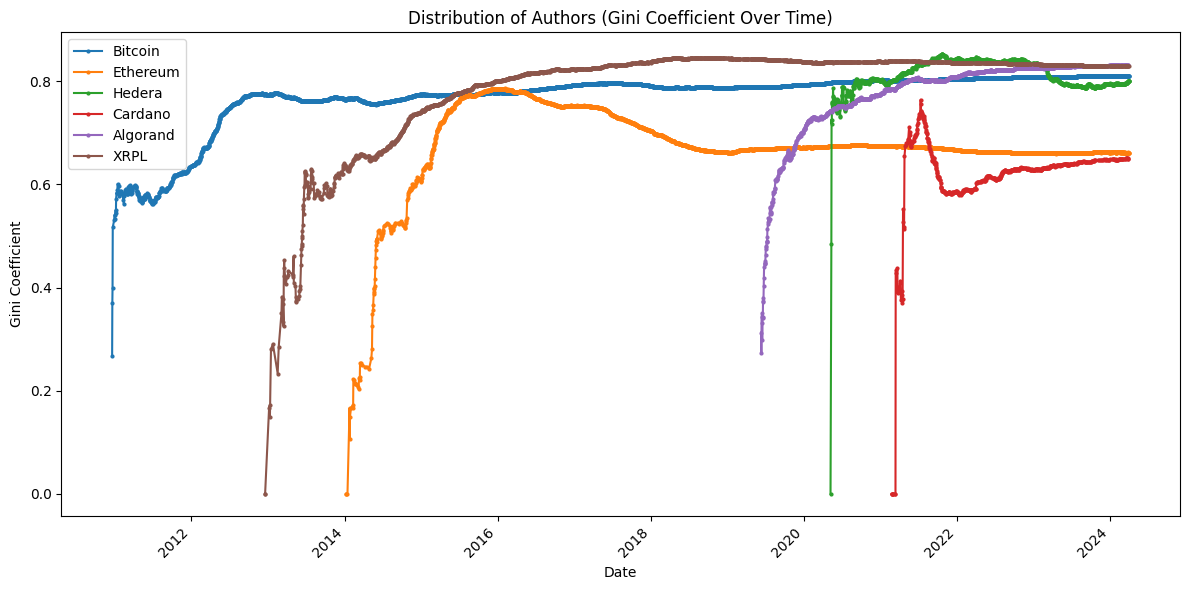

In [25]:
# Calculate Gini series
Bitcoin_gini_series = calculate_gini_over_time(df_Bitcoin)
Ethereum_gini_series = calculate_gini_over_time(df_Ethereum)
Hedera_gini_series = calculate_gini_over_time(df_Hedera)
Cardano_gini_series = calculate_gini_over_time(df_Cardano)
XRPL_gini_series = calculate_gini_over_time(df_Xrpl)
Algorand_gini_series = calculate_gini_over_time(df_Algorand)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(Bitcoin_gini_series.index, Bitcoin_gini_series.values, label='Bitcoin', marker='o', linestyle='-', markersize=2)
plt.plot(Ethereum_gini_series.index, Ethereum_gini_series.values, label='Ethereum', marker='o', linestyle='-', markersize=2)
plt.plot(Hedera_gini_series.index, Hedera_gini_series.values, label='Hedera', marker='o', linestyle='-', markersize=2)
plt.plot(Cardano_gini_series.index, Cardano_gini_series.values, label='Cardano', marker='o', linestyle='-', markersize=2)
plt.plot(Algorand_gini_series.index, Algorand_gini_series.values, label='Algorand', marker='o', linestyle='-', markersize=2)
plt.plot(XRPL_gini_series.index, XRPL_gini_series.values, label='XRPL', marker='o', linestyle='-', markersize=2)
plt.title('Distribution of Authors (Gini Coefficient Over Time)')
plt.xlabel('Date')
plt.ylabel('Gini Coefficient')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [26]:
#Shannon Entropy function
def calculate_shannon_entropy(commenters):
    # Count the occurrences of each commenter
    commenter_counts = Counter(commenters)
    # Calculate the probabilities for each commenter
    probabilities = np.array(list(commenter_counts.values())) / sum(commenter_counts.values())
    # Calculate the Shannon Entropy
    return entropy(probabilities, base=2)

In [27]:
# Calculate entropy
def calculate_entropy(df):
    df['createdAt'] = pd.to_datetime(df['createdAt'])
    df.sort_values('createdAt', inplace=True)

    dates = []
    entropies = []
    all_commenters = []  # Use a list to accumulate commenters

    for date, group in df.groupby('createdAt'):
        # Extend the list of all commenters up to the current date
        commenters_today = [commenter for sublist in group['commenters'] for commenter in sublist]
        all_commenters.extend(commenters_today)

        entropy_today = calculate_shannon_entropy(all_commenters)
        dates.append(date)
        entropies.append(entropy_today)

    return pd.Series(entropies, index=pd.to_datetime(dates))

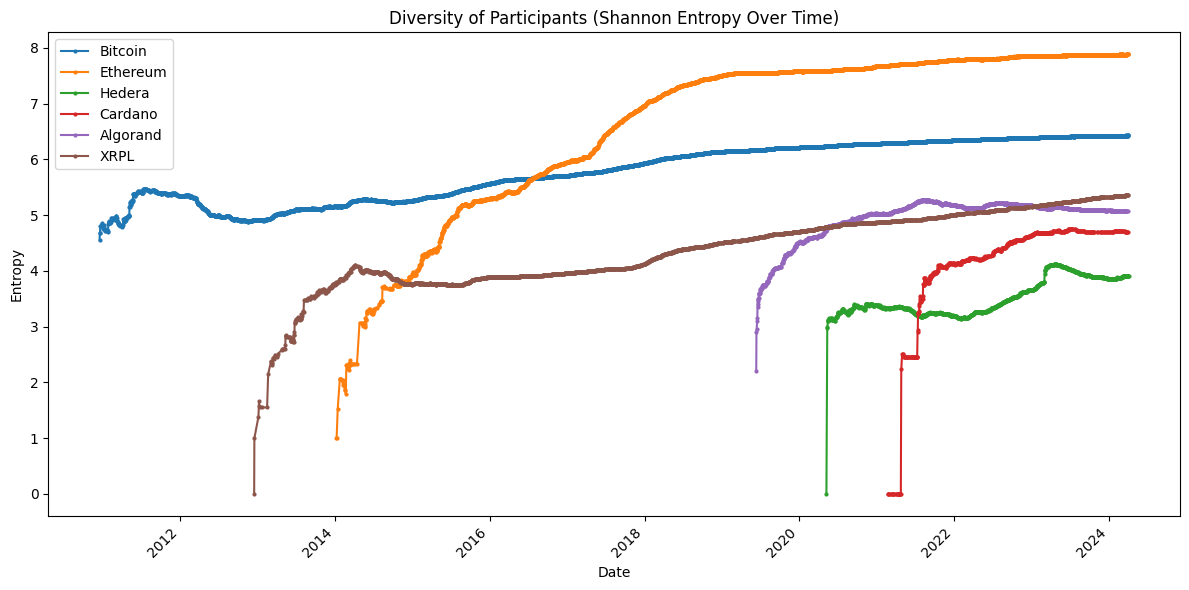

In [28]:
# Calculate entropy series
Bitcoin_entropy_series = calculate_entropy(df_Bitcoin)
Ethereum_entropy_series = calculate_entropy(df_Ethereum)
Hedera_entropy_series = calculate_entropy(df_Hedera)
Cardano_entropy_series = calculate_entropy(df_Cardano)
XRPL_entropy_series = calculate_entropy(df_Xrpl)
Algorand_entropy_series = calculate_entropy(df_Algorand)


# Plotting
plt.figure(figsize=(12, 6))
plt.plot(Bitcoin_entropy_series.index, Bitcoin_entropy_series.values, label='Bitcoin', marker='o', linestyle='-', markersize=2)
plt.plot(Ethereum_entropy_series.index, Ethereum_entropy_series.values, label='Ethereum', marker='o', linestyle='-', markersize=2)
plt.plot(Hedera_entropy_series.index, Hedera_entropy_series.values, label='Hedera', marker='o', linestyle='-', markersize=2)
plt.plot(Cardano_entropy_series.index, Cardano_entropy_series.values, label='Cardano', marker='o', linestyle='-', markersize=2)
plt.plot(Algorand_entropy_series.index, Algorand_entropy_series.values, label='Algorand', marker='o', linestyle='-', markersize=2)
plt.plot(XRPL_entropy_series.index, XRPL_entropy_series.values, label='XRPL', marker='o', linestyle='-', markersize=2)
plt.title('Diversity of Participants (Shannon Entropy Over Time)')
plt.xlabel('Date')
plt.ylabel('Entropy')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [29]:
# Calculate Authors HHI series
def calculate_author_hhi(df, min_threshold=10):
    df['createdAt'] = pd.to_datetime(df['createdAt'])
    df.sort_values('createdAt', inplace=True)

    # Ensure the DataFrame only contains pull requests
    df_pullrequests = df[df['Type'] == 'pullRequests']

    unique_dates = df_pullrequests['createdAt'].dt.date.unique()
    hhi_values = []
    dates = []

    for date in unique_dates:
        # Filter for successful pull requests up to the current date
        filtered_df = df_pullrequests[(df_pullrequests['createdAt'].dt.date <= date) & (df_pullrequests['state'] == 'MERGED')]

        if filtered_df.shape[0] >= min_threshold:
            # Calculate the number of successful pull requests per author
            success_per_author = filtered_df['author'].value_counts()

            # Calculate each author's market share
            market_shares = success_per_author / success_per_author.sum()

            # Calculate the HHI
            hhi = (market_shares ** 2).sum()

            hhi_values.append(hhi)
            dates.append(pd.to_datetime(date))

    return pd.Series(hhi_values, index=dates)


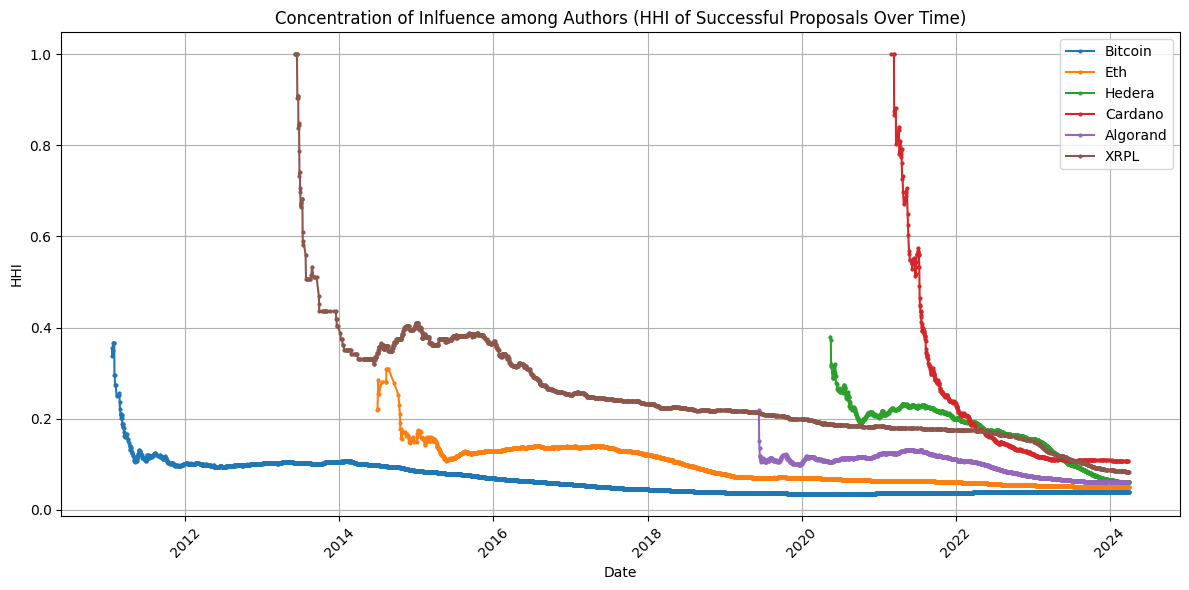

In [30]:
# Plots
Bitcoin_author_hhi_series = calculate_author_hhi(df_Bitcoin, min_threshold=10)
Ethereum_author_hhi_series = calculate_author_hhi(df_Ethereum, min_threshold=10)
Hedera_author_hhi_series = calculate_author_hhi(df_Hedera, min_threshold=10)
Cardano_author_hhi_series = calculate_author_hhi(df_Cardano, min_threshold=10)
Algorand_author_hhi_series = calculate_author_hhi(df_Algorand, min_threshold=10)
XRPL_author_hhi_series = calculate_author_hhi(df_Xrpl, min_threshold=10)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(Bitcoin_author_hhi_series.index, Bitcoin_author_hhi_series.values, label='Bitcoin', marker='o', linestyle='-', markersize=2)
plt.plot(Ethereum_author_hhi_series.index, Ethereum_author_hhi_series.values, label='Eth', marker='o', linestyle='-', markersize=2)
plt.plot(Hedera_author_hhi_series.index, Hedera_author_hhi_series.values, label='Hedera', marker='o', linestyle='-', markersize=2)
plt.plot(Cardano_author_hhi_series.index, Cardano_author_hhi_series.values, label='Cardano', marker='o', linestyle='-', markersize=2)
plt.plot(Algorand_author_hhi_series.index, Algorand_author_hhi_series.values, label='Algorand', marker='o', linestyle='-', markersize=2)
plt.plot(XRPL_author_hhi_series.index, XRPL_author_hhi_series.values, label='XRPL', marker='o', linestyle='-', markersize=2)
plt.title('Concentration of Inlfuence among Authors (HHI of Successful Proposals Over Time)')
plt.xlabel('Date')
plt.ylabel('HHI')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [31]:
# Code review power concentration - HHI function with threshold
def calculate_reviewer_hhi(df, min_threshold=10):
    df['createdAt'] = pd.to_datetime(df['createdAt']).dt.date
    df.sort_values('createdAt', inplace=True)

    # Flatten the 'reviewers' list and associate each reviewer with the 'createdAt' date
    reviewers_expanded = df.explode('reviewers')

    # Filter out rows without reviewers
    reviewers_expanded = reviewers_expanded[reviewers_expanded['reviewers'].notna()]

    hhi_values = []
    dates = []

    unique_dates = sorted(reviewers_expanded['createdAt'].unique())

    cumulative_reviewers = pd.Series(dtype=float)
    for date in unique_dates:
        # Filter data up to the current date
        current_data = reviewers_expanded[reviewers_expanded['createdAt'] <= date]

        if not current_data.empty:
            # Calculate the cumulative count of reviews per reviewer
            reviewer_counts = current_data['reviewers'].value_counts()
            cumulative_reviewers = cumulative_reviewers.add(reviewer_counts, fill_value=0)

            if len(cumulative_reviewers) >= min_threshold:
                # Calculate market shares and the HHI
                market_shares = cumulative_reviewers / cumulative_reviewers.sum()
                hhi = (market_shares ** 2).sum()

                hhi_values.append(hhi)
                dates.append(date)

    # Return a Series of HHI values indexed by dates
    return pd.Series(hhi_values, index=pd.to_datetime(dates))


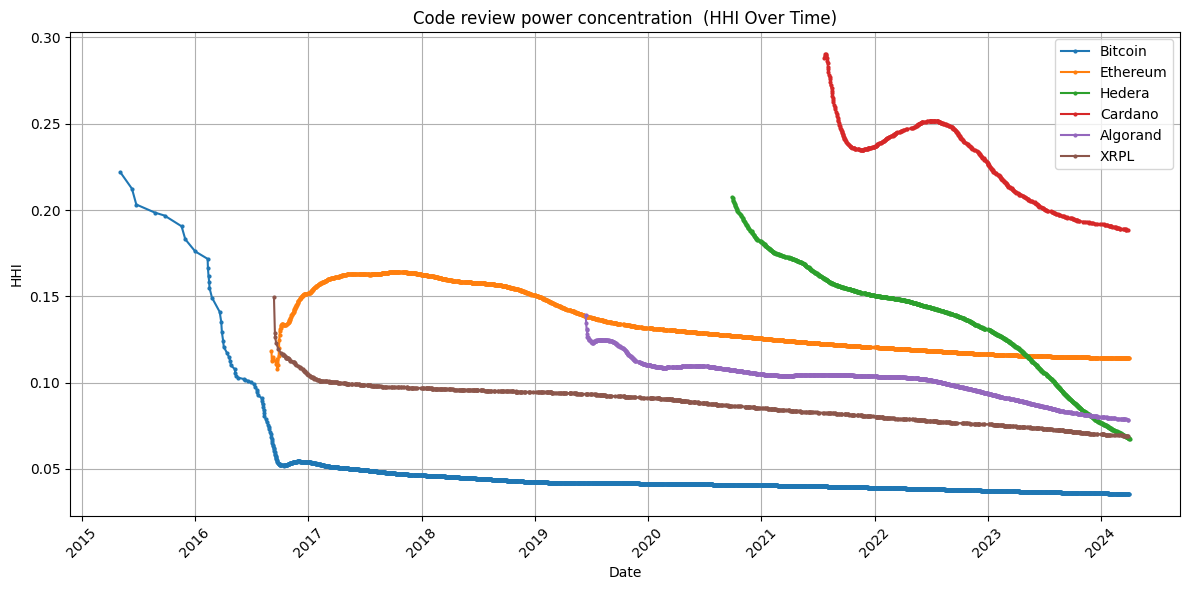

In [32]:
# Calculating HHI
Bitcoin_reviewer_hhi_series = calculate_reviewer_hhi(df_Bitcoin, min_threshold=10)
Ethereum_reviewer_hhi_series = calculate_reviewer_hhi(df_Ethereum, min_threshold=10)
Hedera_reviewer_hhi_series = calculate_reviewer_hhi(df_Hedera, min_threshold=10)
Algorand_reviewer_hhi_series = calculate_reviewer_hhi(df_Algorand, min_threshold=10)
Cardano_reviewer_hhi_series = calculate_reviewer_hhi(df_Cardano, min_threshold=10)
XRPL_reviewer_hhi_series = calculate_reviewer_hhi(df_Xrpl, min_threshold=10)
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(Bitcoin_reviewer_hhi_series.index, Bitcoin_reviewer_hhi_series.values, label='Bitcoin', marker='o', linestyle='-', markersize=2)
plt.plot(Ethereum_reviewer_hhi_series.index, Ethereum_reviewer_hhi_series.values, label='Ethereum', marker='o', linestyle='-', markersize=2)
plt.plot(Hedera_reviewer_hhi_series.index, Hedera_reviewer_hhi_series.values, label='Hedera', marker='o', linestyle='-', markersize=2)
plt.plot(Cardano_reviewer_hhi_series.index, Cardano_reviewer_hhi_series.values, label='Cardano', marker='o', linestyle='-', markersize=2)
plt.plot(Algorand_reviewer_hhi_series.index, Algorand_reviewer_hhi_series.values, label='Algorand', marker='o', linestyle='-', markersize=2)
plt.plot(XRPL_reviewer_hhi_series.index, XRPL_reviewer_hhi_series.values, label='XRPL', marker='o', linestyle='-', markersize=2)
plt.title('Code review power concentration  (HHI Over Time)')
plt.xlabel('Date')
plt.ylabel('HHI')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()